In [1]:
%load_ext autoreload
%autoreload 1
import sys
sys.path.append('..')

In [2]:
from qiskit.providers.fake_provider import FakeJakarta
backend=FakeJakarta()

from simuq.solver import generate_as
from simuq.systems.mzmbraiding import qs
from simuq.aais.ibm_braiding import IbmBraidingFactory
from simuq.backends.qiskit_braiding import transpile
#from simuq.systems.annealing import qs
#from simuq.aais.ibm import get_mach
#mach = get_mach(backend)
#from simuq.backends.qiskit_pulse_ibm import transpile

In [3]:
from simuq.transformation import JW_transform
new_qs, new_sites = JW_transform(qs)

In [4]:
new_qs.evos[0][0].ham

[(['', '', ''], (9+0j)),
 (['Z', '', ''], (-3+0j)),
 (['', 'Z', ''], (-3+0j)),
 (['', '', 'Z'], (-3+0j)),
 (['Y', 'X', ''], (1-0j)),
 (['Y', 'Z', 'X'], (-1+0j)),
 (['', 'Y', 'X'], (1-0j))]

In [6]:
Trot = 1
tol = 0.1

mach = IbmBraidingFactory().generate_qmachine(n=3)
# type(mach)
circ = transpile(backend, *generate_as(new_qs, mach, Trot, 'least_squares', tol))

[(0, 1), (1, 2)]


In [7]:
circ.draw()

global phase: 0
     ┌──────────┐   ┌───┐   ┌────────────────┐                                 »
q_0: ┤ Rz(-π/2) ├───┤ H ├───┤0               ├─────────────────────────────────»
     └──┬───┬───┘┌──┴───┴──┐│  Rzx(-0.60561) │┌──────────┐┌───┐┌──────────────┐»
q_1: ───┤ H ├────┤ Rz(π/2) ├┤1               ├┤ Rz(-π/2) ├┤ H ├┤1             ├»
        ├───┤    └─────────┘└────────────────┘└──────────┘└───┘│  Rzx(2.3768) │»
q_2: ───┤ H ├──────────────────────────────────────────────────┤0             ├»
        └───┘                                                  └──────────────┘»
«                     ┌──────────────┐                                        »
«q_0: ────────────────┤0             ├────────────────────────────────────────»
«     ┌───┐┌─────────┐│  Rzx(2.3768) │┌──────────┐┌───┐┌────────────────┐┌───┐»
«q_1: ┤ H ├┤ Rz(π/2) ├┤1             ├┤ Rz(-π/2) ├┤ H ├┤1               ├┤ H ├»
«     └───┘└─────────┘└──────────────┘└──────────┘└───┘│  Rzx(-0.60561) │└───┘»
«q_2: ─────────────────────────────────────────────────┤0               ├─────»
«                                                      └────────────────┘     »
«                ┌────────────────┐                                      »
«q_0: ───────────┤0               ├──────────────────────────────────────»
«     ┌─────────┐│  Rzx(-0.60561) │┌──────────┐┌───┐┌──────────────┐┌───┐»
«q_1: ┤ Rz(π/2) ├┤1               ├┤ Rz(-π/2) ├┤ H ├┤1             ├┤ H ├»
«     └─────────┘└────────────────┘└──────────┘└───┘│  Rzx(2.3768) │└───┘»
«q_2: ──────────────────────────────────────────────┤0             ├─────»
«                                                   └──────────────┘     »
«                ┌──────────────┐                                        »
«q_0: ───────────┤0             ├────────────────────────────────────────»
«     ┌─────────┐│  Rzx(2.3768) │┌──────────┐┌───┐┌────────────────┐┌───┐»
«q_1: ┤ Rz(π/2) ├┤1             ├┤ Rz(-π/2) ├┤ H ├┤1               ├┤ H ├»
«     └─────────┘└──────────────┘└──────────┘└───┘│  Rzx(-0.60561) │└───┘»
«q_2: ────────────────────────────────────────────┤0               ├─────»
«                                                 └────────────────┘     »
«                ┌────────────────┐                                      »
«q_0: ───────────┤0               ├──────────────────────────────────────»
«     ┌─────────┐│  Rzx(-0.60561) │┌──────────┐┌───┐┌──────────────┐┌───┐»
«q_1: ┤ Rz(π/2) ├┤1               ├┤ Rz(-π/2) ├┤ H ├┤1             ├┤ H ├»
«     └─────────┘└────────────────┘└──────────┘└───┘│  Rzx(2.3768) │└───┘»
«q_2: ──────────────────────────────────────────────┤0             ├─────»
«                                                   └──────────────┘     »
«                ┌──────────────┐                                        »
«q_0: ───────────┤0             ├────────────────────────────────────────»
«     ┌─────────┐│  Rzx(2.3768) │┌──────────┐┌───┐┌────────────────┐┌───┐»
«q_1: ┤ Rz(π/2) ├┤1             ├┤ Rz(-π/2) ├┤ H ├┤1               ├┤ H ├»
«     └─────────┘└──────────────┘└──────────┘└───┘│  Rzx(-0.60561) │└───┘»
«q_2: ────────────────────────────────────────────┤0               ├─────»
«                                                 └────────────────┘     »
«                ┌────────────────┐                                      »
«q_0: ───────────┤0               ├──────────────────────────────────────»
«     ┌─────────┐│  Rzx(-0.60561) │┌──────────┐┌───┐┌──────────────┐┌───┐»
«q_1: ┤ Rz(π/2) ├┤1               ├┤ Rz(-π/2) ├┤ H ├┤1             ├┤ H ├»
«     └─────────┘└────────────────┘└──────────┘└───┘│  Rzx(2.3768) │└───┘»
«q_2: ──────────────────────────────────────────────┤0             ├─────»
«                                                   └──────────────┘     »
«                ┌──────────────┐                                   ┌─────────┐»
«q_0: ───────────┤0             ├───────────────────────────────────┤0        ├»
«     ┌─────────┐│  Rzx(2.3768) │┌──────────┐┌───┐┌────────────────┐│ 

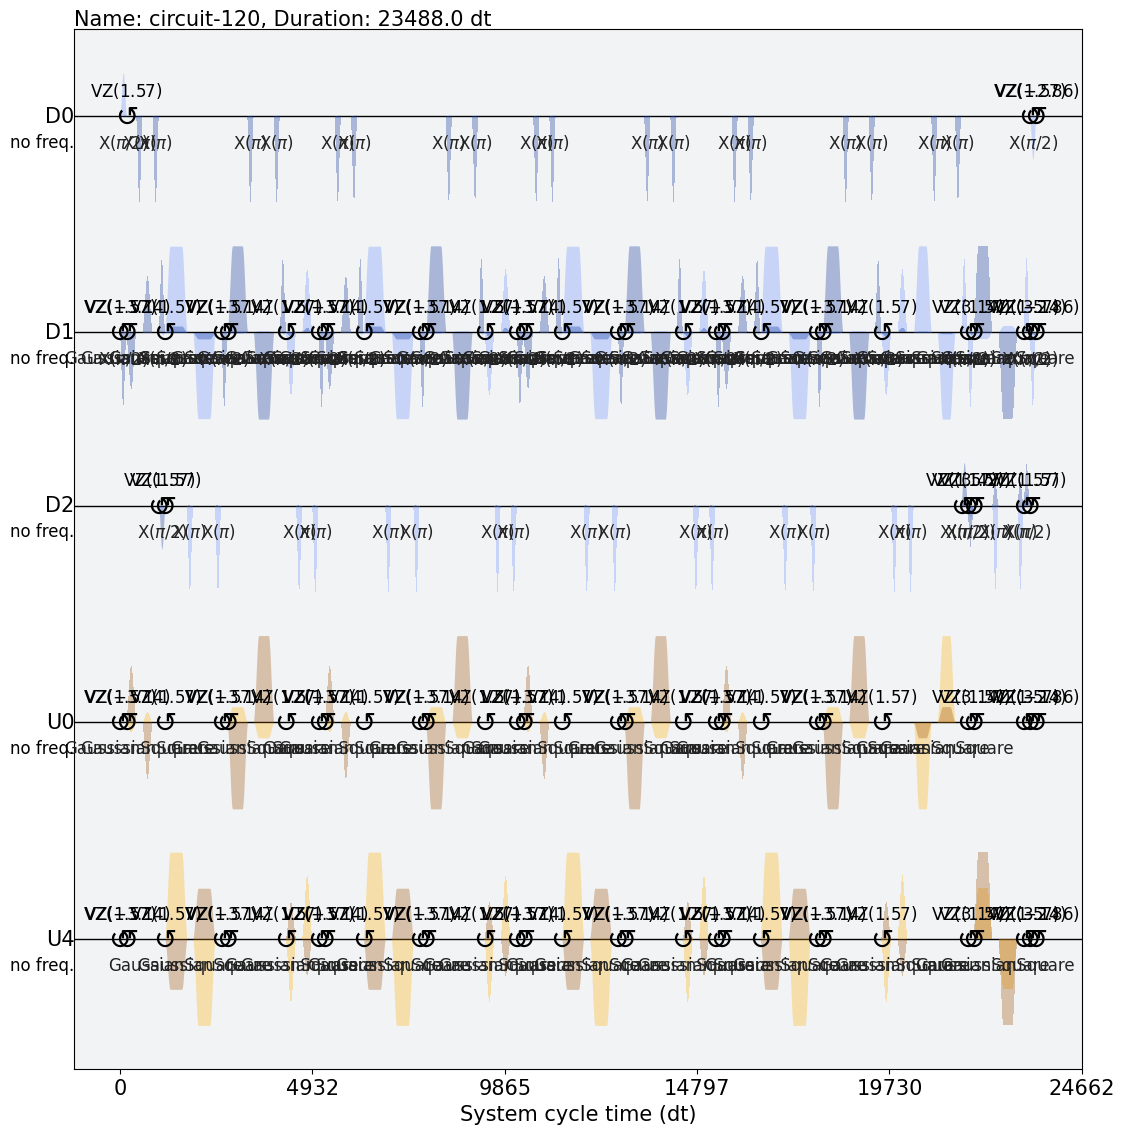

In [8]:
from qiskit import schedule
from qiskit import transpile as ibm_transpile
sch = schedule(ibm_transpile(circ, backend), backend)
sch.draw()